In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ARIMA Model for Forecasting

A popular and widely used statistical method for time series forecasting is the ARIMA model.
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

## Autoregressive Integrated Moving Average Model

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.
It explicitly caters to a suite of standard structures in time series data, and as such provides a
simple yet powerful method for making skillful time series forecasts. ARIMA is an acronym
that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler
AutoRegressive Moving Average and adds the notion of integration.

* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
* I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA model are defined as follows:
* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

<ipython-input-5-a973309cf4bd>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parser = lambda x: pd.datetime.strptime('190'+x, '%Y-%m')


,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


<AxesSubplot:xlabel='Month'>

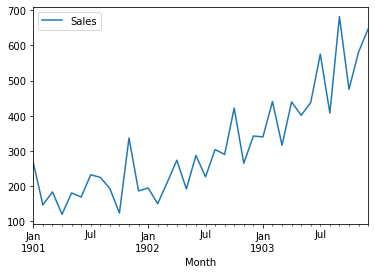

In [5]:
parser = lambda x: pd.datetime.strptime('190'+x, '%Y-%m')
df = pd.read_csv('./dataset/shampoo_sales.csv', parse_dates=['Month'], index_col='Month', date_parser=parser)
display(df.head())
df.plot()

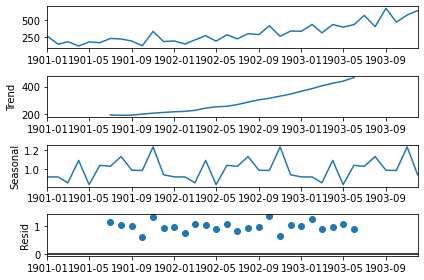

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

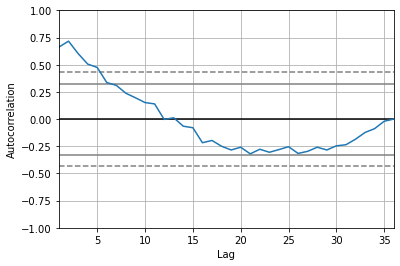

In [8]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

Running the example, we can see that there is a positive correlation with the first 10-to-12
lags that is perhaps significant for the first 5 lags. A good starting point for the AR parameter
of the model may be 5.

We will fit an ARIMA model to the entire Shampoo
Sales dataset and review the residual errors. First, we fit an ARIMA(5,1,0) model. This sets the
lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary,
and uses a moving average model of 0. When ftting the model, a lot of debug information is
provided about the fit of the linear regression model. We can turn this of by setting the disp
argument to 0.

In [9]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(5, 1, 0))
model_fit = model.fit(disp=0)

# summary of fit model
print(model_fit.summary())

C:\Users\Angga\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Angga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 13 Mar 2022   AIC                            406.340
Time:                        19:22:17   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

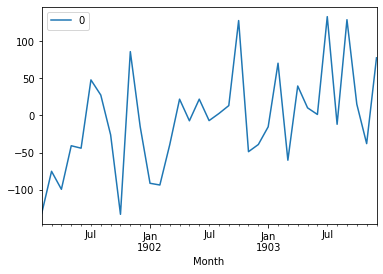

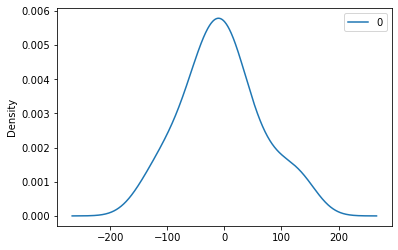

,0
count,35.000000
mean,-5.495235
std,68.132880
min,-133.296624
25%,-42.477901
50%,-7.186602
75%,24.748326
max,133.237957


In [15]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

residuals.describe()

## Rolling Forecast ARIMA Model 

train: 8, test: 7
train: 15, test: 7
train: 22, test: 7
train: 29, test: 7
(array([446.37948481]), array([54.05600119]), array([[340.43166933, 552.32730029]]))
predicted=446.379485, expected=437.400000


C:\Users\Angga\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(array([394.73730999]), array([53.14167754]), array([[290.58153593, 498.89308406]]))
predicted=394.737310, expected=575.500000
(array([434.91565842]), array([60.99833845]), array([[315.36111193, 554.47020491]]))
predicted=434.915658, expected=407.600000
(array([507.92347791]), array([60.01758813]), array([[390.29116674, 625.55578908]]))
predicted=507.923478, expected=682.000000
(array([435.48296839]), array([64.02923416]), array([[309.98797548, 560.97796131]]))
predicted=435.482968, expected=475.300000
(array([652.74378576]), array([63.48877403]), array([[528.30807523, 777.17949628]]))
predicted=652.743786, expected=581.300000
(array([546.34350288]), array([63.45598402]), array([[421.97205959, 670.71494616]]))
predicted=546.343503, expected=646.900000
Test RMSE: 107.308


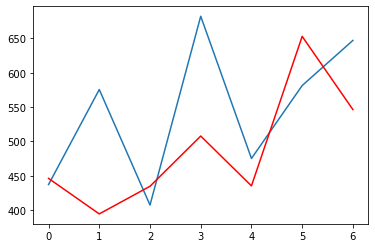

In [26]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

data = df.values.flatten()
splits = TimeSeriesSplit(n_splits=4)

for train_index, test_index in splits.split(data):
    train = data[train_index]
    test = data[test_index]
    print(f'train: {len(train)}, test: {len(test)}')
history = list(train.copy())
predictions = []

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y_pred = output[0]
    predictions.append(y_pred)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (y_pred, obs))

# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()